Allison Aprile

CPE645 Final Project

Dog Camera - Method Exploration

# K-Means Clustering
* Based on division into homogenous clusters (i.e. where pixels of a cluster have similar characteristics) 
* Hierachical (based on trees) or partition (optimization) methods
* **Hard Clustering**: a pixel can only belong to one cluster
  - E.g. K-Means Clustering
    - K centroids are randomly initialized, then each pixel is assigned its nearest centroid, then centroids are adjusted to be mean of points, and reassigned until little change
    - Emphasizes maximizing intra-cluster similarity and minimizing inter-cluster equality
  - Results in comparable spatial extent; need Expectation Maximization methods for different shapes
* **Soft Clustering**: more natural clustering because not exact division; flexible
  - E.g. Fuzzy C-Means Clustering
    - Pixels are partitioned into clusters based on partial membership
      - Pixel can belong to multiple clusters based on membership values
      - Determining membership can be difficult for noisy images

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Mount drive for testing images
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load testing files in RGB
test1 = cv2.imread('/content/drive/My Drive/Aprile_CPE695_Final_Project/test_images/test1.jpg', cv2.COLOR_BGR2RGB)
test2 = cv2.imread('/content/drive/My Drive/Aprile_CPE695_Final_Project/test_images/test2.jpg', cv2.COLOR_BGR2RGB)
test3 = cv2.imread('/content/drive/My Drive/Aprile_CPE695_Final_Project/test_images/test3.jpg', cv2.COLOR_BGR2RGB)
test4 = cv2.imread('/content/drive/My Drive/Aprile_CPE695_Final_Project/test_images/test4.jpg', cv2.COLOR_BGR2RGB)
test5 = cv2.imread('/content/drive/My Drive/Aprile_CPE695_Final_Project/test_images/test5.jpg', cv2.COLOR_BGR2RGB)
test6 = cv2.imread('/content/drive/My Drive/Aprile_CPE695_Final_Project/test_images/test6.jpg', cv2.COLOR_BGR2RGB)
test7 = cv2.imread('/content/drive/My Drive/Aprile_CPE695_Final_Project/test_images/test7.jpg', cv2.COLOR_BGR2RGB)

test_imgs = [test1, test2, test3, test4, test5, test6, test7]

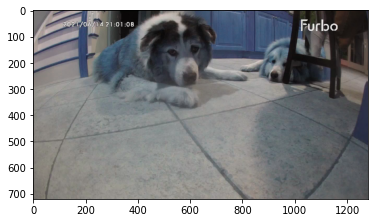

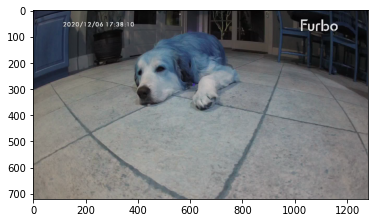

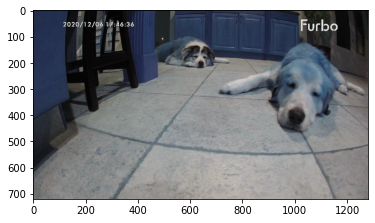

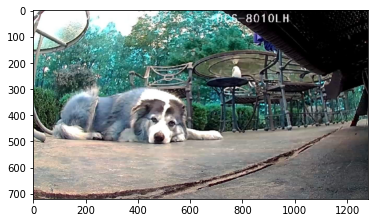

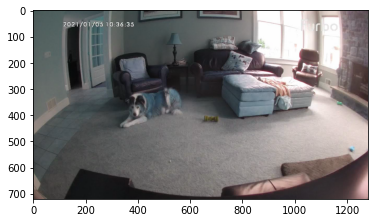

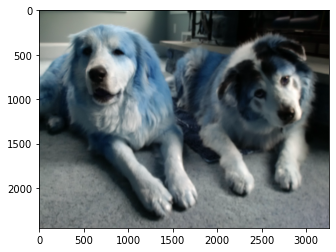

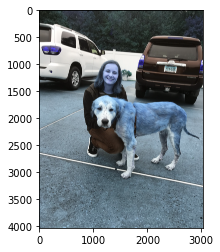

In [ ]:
# Plot images
for t in test_imgs:
  plt.imshow(t)
  plt.show()

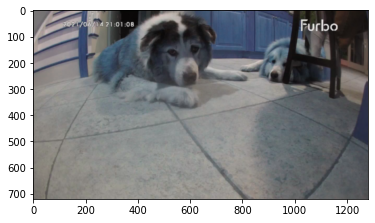

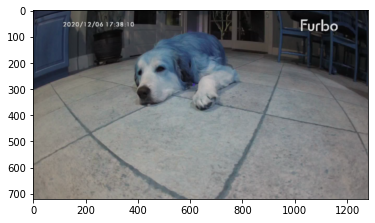

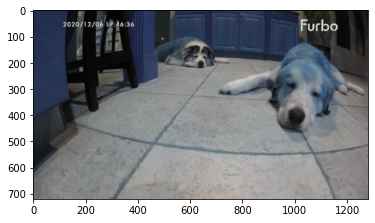

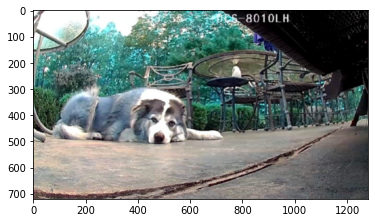

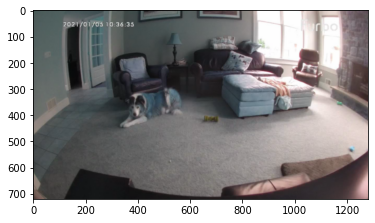

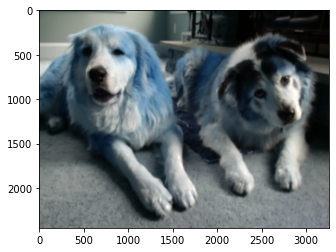

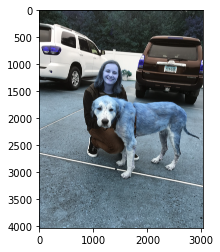

In [ ]:
smoothed_imgs = []
# Apply Gaussian smoothing on images with 5x5 filter
for i in range(len(test_imgs)):
  t = cv2.GaussianBlur(test_imgs[i], (5, 5), 0)
  smoothed_imgs.append(t)

  # Plot
  plt.imshow(t)
  plt.show()

### Apply K-Means Clustering (for k = 2, 3, 4, 5, 6)
(https://www.geeksforgeeks.org/image-segmentation-using-k-means-clustering/)

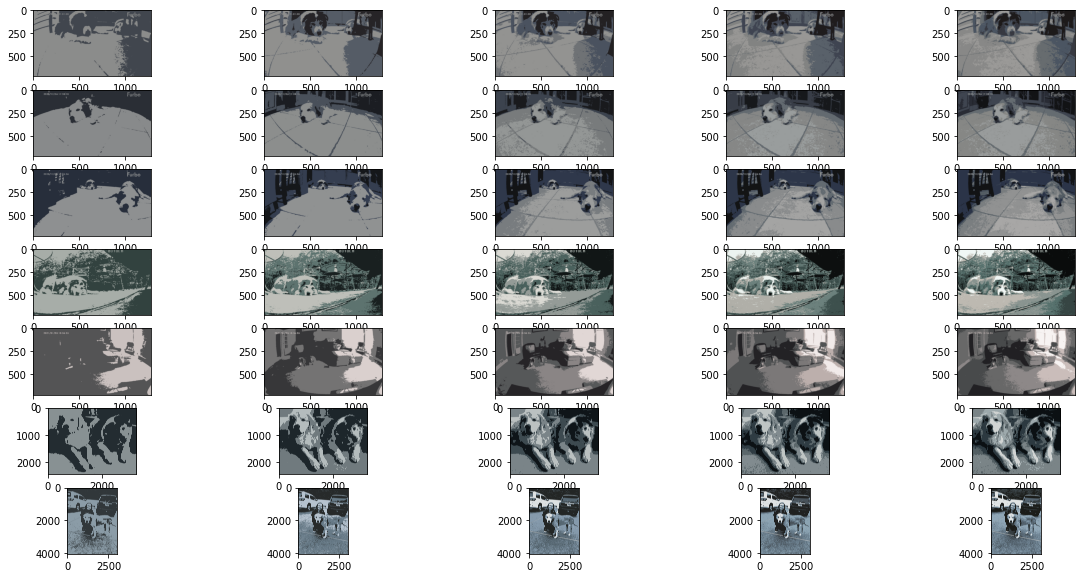

In [ ]:
# Define stop criteria for algorithm (either execute 100 iterations or intra-cluster similarity > 70%)
stop_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.70)

fig, axs = plt.subplots(len(smoothed_imgs), len([2, 3, 4, 5, 6]))
fig.set_size_inches(20, 10)

# Perform K-Means Clustering for each image (with randomly initialized centroids)
for s in list(range(len(smoothed_imgs))):
  # Reshape images into 2-D array of pixels to represent RGB color values - necessary to apply clustering
  pixels = np.float32(smoothed_imgs[s].reshape((-1, 3)))

  for k in [2, 3, 4, 5, 6]:
    _, labels, centers = cv2.kmeans(pixels, k, None, stop_criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert data to 8 bits
    centers = np.uint8(centers)
    
    # Segment data according to clusters
    segments = centers[labels.flatten()]
    segments = segments.reshape((smoothed_imgs[s].shape))

    axs[s, k - 2].imshow(segments)
    if i == 0:
      axs[s, k - 2].set_title('K=' + str(k))

plt.show()